In [1]:
%run -i framework.py
%run -i real.py
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import xmltodict

## Read Data  
n_comments is regarded as performance values for each news, so no extra calculation is needed.

In [8]:
df = pd.read_csv('./nyt-articles-2020.csv')
df = df[['section', 'n_comments','uniqueID']]
df.head()

,section,n_comments,uniqueID
0,Opinion,186,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...
1,Crosswords & Games,257,nyt://article/9edddb54-0aa3-5835-a833-d311a76f...
2,Science,6,nyt://article/04bc90f0-b20b-511c-b5bb-3ce13194...
3,Science,2,nyt://interactive/5b58d876-9351-50af-9b41-a312...
4,Science,25,nyt://article/bd8647b3-8ec6-50aa-95cf-2b81ed12...


In [3]:
sections = np.array(df['section'].dropna(how='any').unique())
num_sections = sections.size
sections

array(['Opinion', 'Crosswords & Games', 'Science', 'World', 'Magazine',
       'Books', 'Well', 'Arts', 'Real Estate', 'Business Day', 'Theater',
       'Movies', 'Style', 'New York', 'U.S.', 'Obituaries',
       'The Learning Network', 'Sports', 'Travel', 'Health', 'Podcasts',
       'Technology', 'Food', 'The Upshot', 'Reader Center', 'Climate',
       'Fashion & Style', 'The Weekly', 'T Magazine', 'Automobiles',
       'Sunday Review', 'Education', 'Smarter Living', 'Times Insider',
       'Parenting', 'Your Money', 'At Home', 'Briefing', 'Video',
       'International Home', 'Universal', 'Admin'], dtype=object)

Text(0.5, 0, 'number of comments')

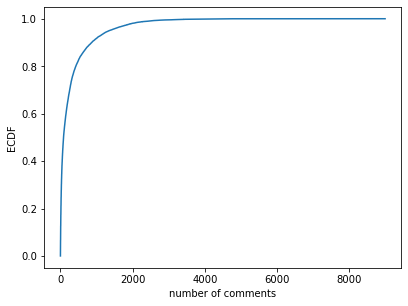

In [10]:
fig= plt.figure (figsize= (6.4,4.8)) 
ecdf = ECDF(df['n_comments'])
plt.plot(ecdf.x, ecdf.y)
plt.ylabel("ECDF")
plt.xlabel("number of comments")

In [5]:
import matplotlib.pyplot as plt 
## fig.hist(df['n_comments'], bins=100)
df.to_csv('times.csv', index=False)

## Sample from ECDFs

In [9]:
## sample statistics per section
data = np.array([np.array(df[df['section']==s]['n_comments']) for s in sections],dtype=object)
import pickle5 as pickle
data_sizes = np.array([data[i].size for i in range(num_sections)])
candidates = np.array([i for i in range(num_sections) if data_sizes[i] >= 100])
with open('news.pickle', 'wb') as f:
    pickle.dump([data, candidates], f)

In [4]:
import pickle5 as pickle
with open('news.pickle', 'rb') as f:
    data, candidates = pickle.load(f)

In [5]:
samples_p = Real_sample(data, candidates, n_sample)
samples_q = Discretized_real_sample(data, candidates, 0.01, n_sample)

In [6]:
create_output_comp()
n = len(candidates)
for k in kvals:
    set_items = get_sets(n, k, n_sets)
    for obj in objs:  
        run_comparison(n, k, n_sample, samples_p, samples_q, obj, n_sets, set_items)   

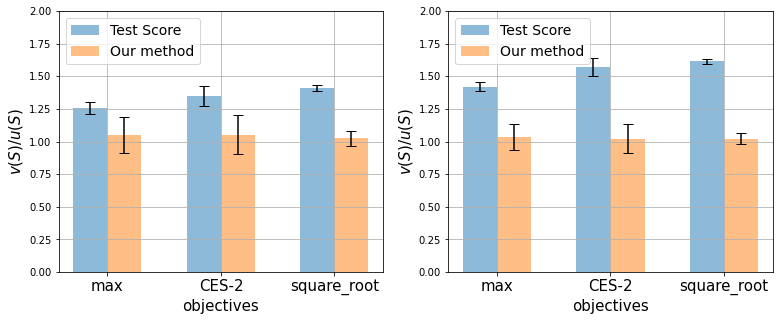

In [7]:
def bar_plot(objs):
    df = pd.read_csv('./res_score.csv')
    fig, axes = plt.subplots(1, 2, figsize = (6.4*2, 4.8))
    for i, k in enumerate(kvals):  
        current = df[(df['k'] == k)]
        x_axis = np.arange(len(objs))
        
        # calculate means and stds
        TS_mean = current.groupby(['obj'])['ratio_TS'].mean()
        EB_mean = current.groupby(['obj'])['ratio_EB'].mean()     
        TS_std = current.groupby(['obj'])['ratio_TS'].std()
        EB_std = current.groupby(['obj'])['ratio_EB'].std()  
        
        axes[i].bar(x_axis -0.15, TS_mean, yerr= TS_std, capsize=5, width=0.3, label = 'Test Score', alpha= 0.5)
        axes[i].bar(x_axis +0.15, EB_mean, yerr= EB_std, capsize=5, width=0.3, label = 'Our method', alpha= 0.5)
        # add legends
        axes[i].legend(fontsize=14,loc='upper left')
        axes[i].grid()
        # set xticks and labels
        axes[i].set_xticks(x_axis)
        axes[i].set_xticklabels(objs, fontsize= 15)
        axes[i].set_xlabel("objectives", fontsize= 15)
        axes[i].set_ylabel("$v(S)/u(S)$", fontsize= 15)
        axes[i].set_ylim((0, 2)) 
bar_plot(objs)       